In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("crime.csv" , encoding = 'latin-1')

In [20]:
data.head()
data.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319058,I100033064-00,2910,Violations,VAL - OPERATING AFTER REV/SUSP.,B2,304,NaN,2016-07-29 18:20:00,2016,7,Friday,18,Part Two,SLAYTON WAY,42.321770,-71.097798,"(42.32177032, -71.09779774)"
319059,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,NaN,2016-02-01 01:43:00,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"
319060,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,NaN,2016-02-01 01:43:00,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [18]:
data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [21]:
data = data.loc[data['YEAR'].isin([2016,2018])]

In [22]:
# Keep only data on UCR Part One offenses
data = data.loc[data['UCR_PART'] == 'Part One']

# Remove unused columns
data = data.drop(['INCIDENT_NUMBER','OFFENSE_CODE','UCR_PART','Location'], axis=1)

In [23]:
# Convert OCCURED_ON_DATE to datetime
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

# Fill in nans in SHOOTING column
data.SHOOTING.fillna('N', inplace=True)

In [24]:
# Convert DAY_OF_WEEK to an ordered category
data.DAY_OF_WEEK = pd.Categorical(data.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

In [25]:
# Replace -1 values in Lat/Long with Nan
data.Lat.replace(-1, None, inplace=True)
data.Long.replace(-1, None, inplace=True)

In [26]:
data.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
54883,Larceny,LARCENY ALL OTHERS,E5,562,N,2016-09-01 00:00:00,2016,9,Thursday,0,BASILE ST,42.286654,-71.126654
58503,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,C11,,N,2016-12-22 04:15:00,2016,12,Thursday,4,DORCHESTER AVE,NaN,NaN
60048,Larceny,LARCENY THEFT FROM BUILDING,C6,214,N,2016-12-01 12:00:00,2016,12,Thursday,12,W BROADWAY,42.337314,-71.048523
71669,Larceny,LARCENY ALL OTHERS,A7,26,N,2016-04-03 10:00:00,2016,4,Sunday,10,BORDER ST,42.382292,-71.040364
74511,Larceny,LARCENY ALL OTHERS,D14,785,N,2016-10-08 00:00:00,2016,10,Saturday,0,COMMONWEALTH AVE,42.342414,-71.144605


In [27]:
# A few more data checks
data.dtypes
data.isnull().sum()
data.shape

(19222, 13)

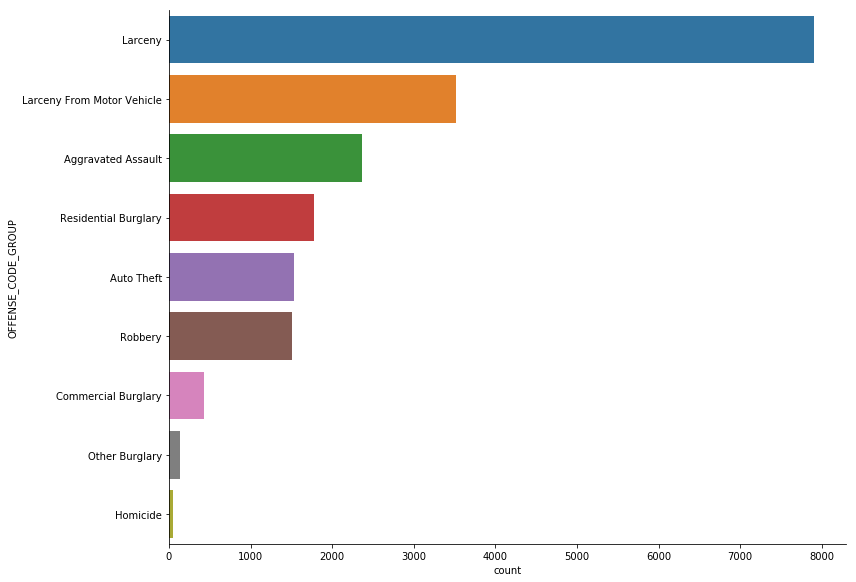

In [31]:
# Countplot for crime types
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=data.OFFENSE_CODE_GROUP.value_counts().index,
           data=data)

Text(-2.575000000000003, 0.5, 'Count')

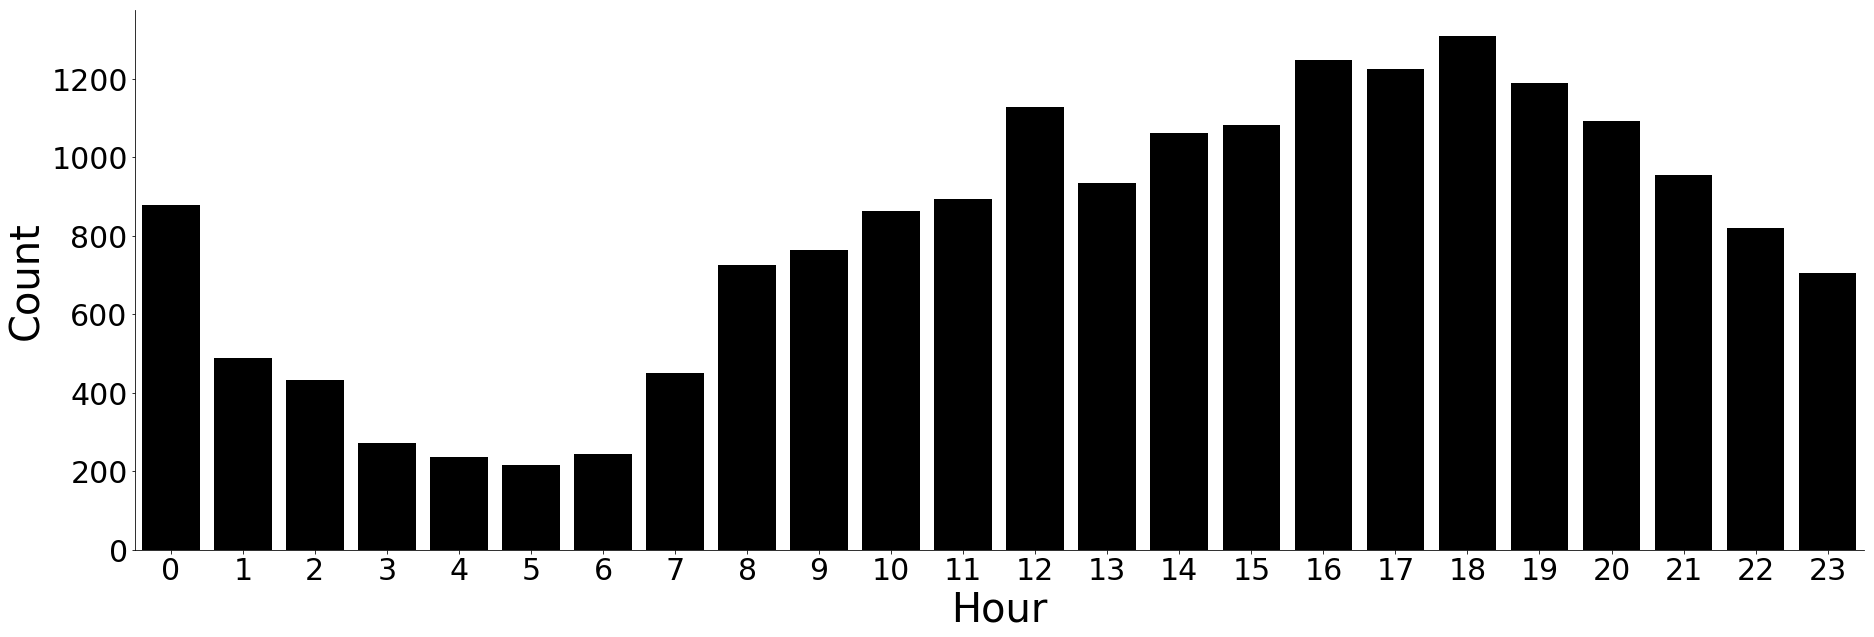

In [33]:
sns.catplot(x='HOUR',
           kind='count',
            height=8.27, 
            aspect=3,
            color='black',
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Count', fontsize=40)

In [37]:
data.columns

Index(['OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'STREET', 'Lat', 'Long'],
      dtype='object')

Text(-2.5749999999999957, 0.5, 'Count')

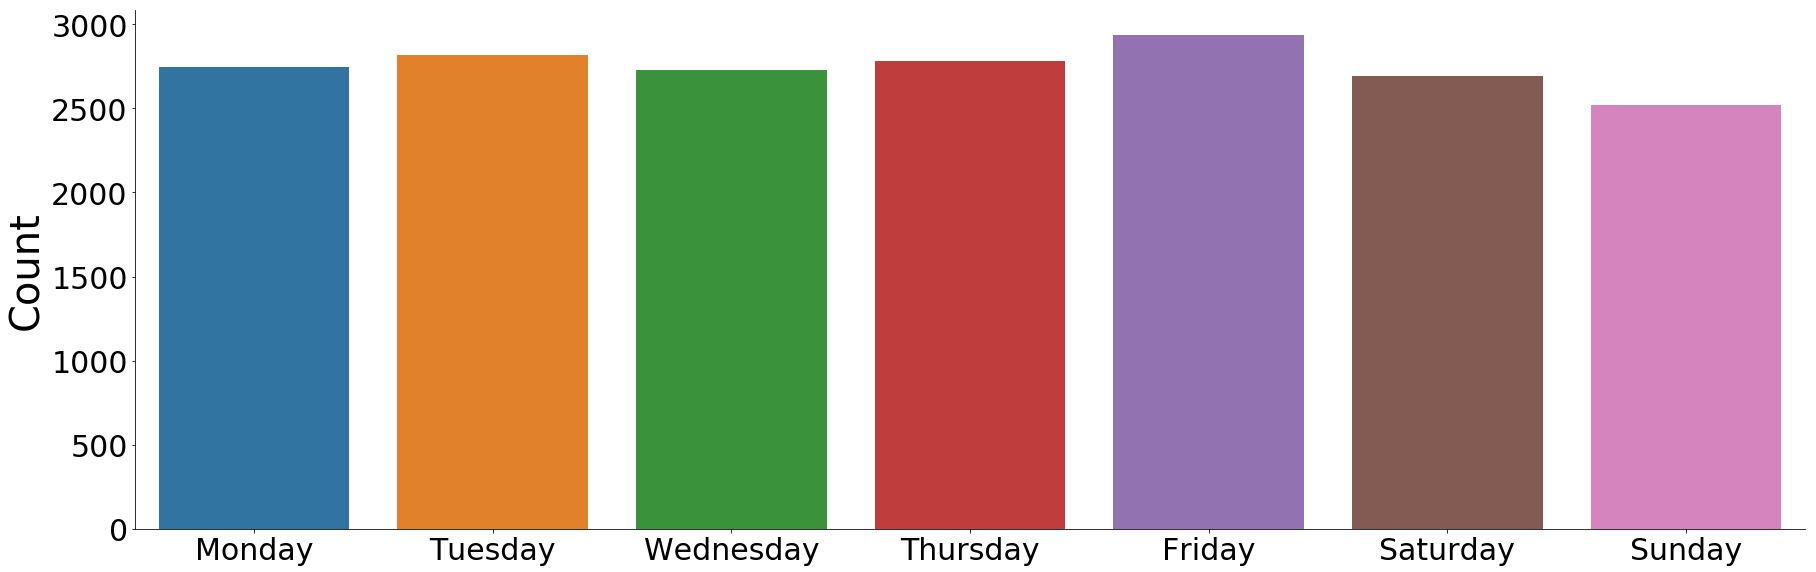

In [43]:
# Crimes by day of the week
sns.catplot(x='DAY_OF_WEEK',
           kind='count',
            height=8, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

Text(-2.6999999999999957, 0.5, 'Count')

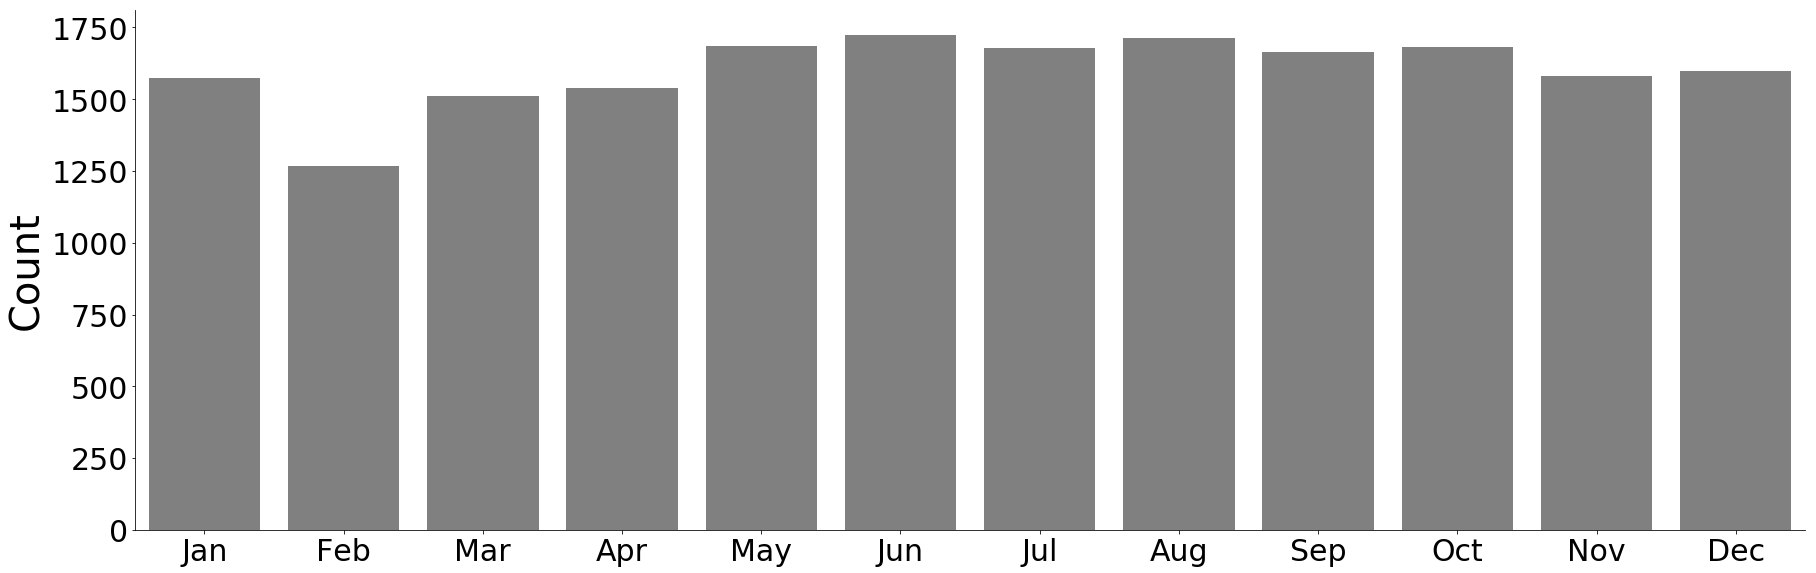

In [45]:
# Crimes by month of year
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='MONTH',
           kind='count',
            height=8, 
            aspect=3,
            color='gray',
           data=data)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

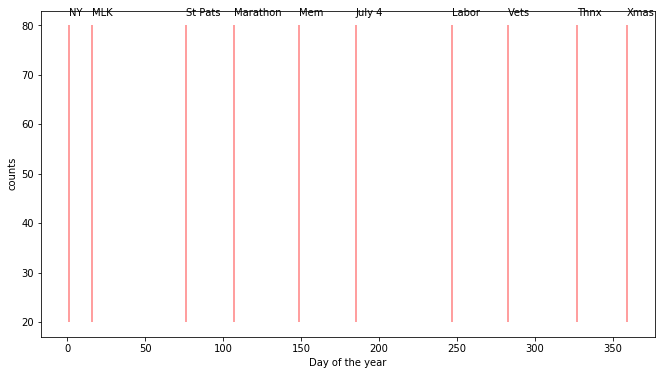

In [50]:
# Create data for plotting
data['Day_of_year'] = data.OCCURRED_ON_DATE.dt.dayofyear
data_holidays = data[data.YEAR == 2017].groupby(['Day_of_year']).size().reset_index(name='counts')

# Dates of major U.S. holidays in 2017
holidays = pd.Series(['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25']) # Christmas
holidays = pd.to_datetime(holidays).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'St Pats',
                 'Marathon',
                 'Mem',
                 'July 4',
                 'Labor',
                 'Vets',
                 'Thnx',
                 'Xmas']
import datetime as dt
# Plot crimes and holidays
fig, ax = plt.subplots(figsize=(11,6))
sns.lineplot(x='Day_of_year',
            y='counts',
            ax=ax,
            data=data_holidays)
plt.xlabel('Day of the year')
plt.vlines(holidays, 20, 80, alpha=0.5, color ='r')
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=82, s=holidays_names[i])
